# Gradient Boosting Classification Implementation

## Holiday Package Prediction

### 1. Problem Statement
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

### 2. Data Collection
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction The data consists of 20 column and 4888 rows.

## 1. Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, \
                            recall_score, f1_score, roc_auc_score, roc_curve

pd.options.display.float_format = '{:,.2f}'.format    # pandas: para todos os números aparecerem com duas casas decimais
np.set_printoptions(precision=2, suppress=True)      # numpy: para todos os números aparecerem com duas casas decimais

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Data-Science-With-Machine-Learning-And-NLP-2024/refs/heads/main/11-Random%20Forest/Projects/Classification/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00,Self Enquiry,3,6.00,Salaried,Female,3,3.00,Deluxe,3.00,Single,1.00,1,2,1,0.00,Manager,"20,993.00"
1,200001,0,49.00,Company Invited,1,14.00,Salaried,Male,3,4.00,Deluxe,4.00,Divorced,2.00,0,3,1,2.00,Manager,"20,130.00"
2,200002,1,37.00,Self Enquiry,1,8.00,Free Lancer,Male,3,4.00,Basic,3.00,Single,7.00,1,3,0,0.00,Executive,"17,090.00"
3,200003,0,33.00,Company Invited,1,9.00,Salaried,Female,2,3.00,Basic,3.00,Divorced,2.00,1,5,1,1.00,Executive,"17,909.00"
4,200004,0,NaN,Self Enquiry,1,8.00,Small Business,Male,2,3.00,Basic,4.00,Divorced,1.00,0,5,1,0.00,Executive,"18,468.00"


## 2. Data Cleaning

1. Handling Missing Values
2. Handling Duplicates
3. Check Data Type
4. Understand the Dataset

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
## Check Categories
df.select_dtypes(include='object').columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [9]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [10]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [11]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [12]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00,Self Enquiry,3,6.00,Salaried,Female,3,3.00,Deluxe,3.00,Unmarried,1.00,1,2,1,0.00,Manager,"20,993.00"
1,200001,0,49.00,Company Invited,1,14.00,Salaried,Male,3,4.00,Deluxe,4.00,Divorced,2.00,0,3,1,2.00,Manager,"20,130.00"
2,200002,1,37.00,Self Enquiry,1,8.00,Free Lancer,Male,3,4.00,Basic,3.00,Unmarried,7.00,1,3,0,0.00,Executive,"17,090.00"
3,200003,0,33.00,Company Invited,1,9.00,Salaried,Female,2,3.00,Basic,3.00,Divorced,2.00,1,5,1,1.00,Executive,"17,909.00"
4,200004,0,NaN,Self Enquiry,1,8.00,Small Business,Male,2,3.00,Basic,4.00,Divorced,1.00,0,5,1,0.00,Executive,"18,468.00"


### Check Missing Values

In [13]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [14]:
# Statistics Summary
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,"4,662.00","4,637.00","4,843.00","4,862.00","4,748.00","4,822.00","4,655.00"
mean,37.62,15.49,3.71,3.58,3.24,1.19,"23,619.85"
std,9.32,8.52,1.00,0.80,1.85,0.86,"5,380.70"
min,18.00,5.00,1.00,3.00,1.00,0.00,"1,000.00"
25%,31.00,9.00,3.00,3.00,2.00,1.00,"20,346.00"
50%,36.00,13.00,4.00,3.00,3.00,1.00,"22,347.00"
75%,44.00,20.00,4.00,4.00,4.00,2.00,"25,571.00"
max,61.00,127.00,6.00,5.00,22.00,3.00,"98,678.00"


### Imputing Null Values

1. Impute Median for Age column
2. Impute Mode for Type of Contactt
3. Impute Median for Duration of Pitch
4. Impute Mode for Number of Followups as it a Discrete Feature
5. Impute Mode for Preferred Property Star
6. Impute Median for Number of Trips
7. Impute Mode for Number of Children Visiting
8. Impute Median for Monthly Income

In [15]:
# Age
df.Age.fillna(df.Age.median(), inplace=True)

# Type of Contact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

# Duration of Pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

# Number of Followups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

# PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

# NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

# Monthly Income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
df.drop('CustomerID', inplace=True, axis=1)

## 3. Feature Engineering

### Faeture Extraction

In [18]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.00,Self Enquiry,3,6.00,Salaried,Female,3,3.00,Deluxe,3.00,Unmarried,1.00,1,2,1,0.00,Manager,"20,993.00"
1,0,49.00,Company Invited,1,14.00,Salaried,Male,3,4.00,Deluxe,4.00,Divorced,2.00,0,3,1,2.00,Manager,"20,130.00"
2,1,37.00,Self Enquiry,1,8.00,Free Lancer,Male,3,4.00,Basic,3.00,Unmarried,7.00,1,3,0,0.00,Executive,"17,090.00"
3,0,33.00,Company Invited,1,9.00,Salaried,Female,2,3.00,Basic,3.00,Divorced,2.00,1,5,1,1.00,Executive,"17,909.00"
4,0,36.00,Self Enquiry,1,8.00,Small Business,Male,2,3.00,Basic,4.00,Divorced,1.00,0,5,1,0.00,Executive,"18,468.00"


In [19]:
# create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [20]:
## Get all numerical features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features: ', len(num_features))

Num of Numerical Features:  12


In [21]:
# Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features: ', len(cat_features))

Num of Categorical Features:  6


In [22]:
# Discrete Features
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('Num of Discrete Features: ', len(discrete_features))

Num of Discrete Features:  9


In [23]:
# Continuous Features 
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features: ', len(continuous_features))

Num of Continuous Features:  3


## 4. Train Test Split and Preprocessing

In [24]:
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [25]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.00,Self Enquiry,3,6.00,Salaried,Female,3.00,Deluxe,3.00,Unmarried,1.00,1,2,1,Manager,"20,993.00",3.00
1,49.00,Company Invited,1,14.00,Salaried,Male,4.00,Deluxe,4.00,Divorced,2.00,0,3,1,Manager,"20,130.00",5.00
2,37.00,Self Enquiry,1,8.00,Free Lancer,Male,4.00,Basic,3.00,Unmarried,7.00,1,3,0,Executive,"17,090.00",3.00
3,33.00,Company Invited,1,9.00,Salaried,Female,3.00,Basic,3.00,Divorced,2.00,1,5,1,Executive,"17,909.00",3.00
4,36.00,Self Enquiry,1,8.00,Small Business,Male,3.00,Basic,4.00,Divorced,1.00,0,5,1,Executive,"18,468.00",2.00


In [26]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [29]:
# Create Column Transformer with 3 Typed of Transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer([
    ('OneHotEncoder', oh_transformer, cat_features),
    ('StandardScaler', numeric_transformer, num_features)
])

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [30]:
# applying transformation in training 
X_train = preprocessor.fit_transform(X_train)

In [31]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,-0.72,-1.02,1.28,-0.73,-0.13,-0.63,0.68,0.78,-0.38,-0.77
1,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,...,-0.72,0.69,0.28,-0.73,1.51,-0.63,0.68,0.78,-0.46,0.64
2,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.72,-1.02,0.28,1.77,0.42,-0.63,0.68,0.78,-0.25,-0.07
3,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,...,-0.72,-1.02,1.28,-0.73,-0.13,-0.63,1.41,-1.28,0.21,-0.07
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.72,2.40,-1.72,-0.73,1.51,-0.63,-0.05,-1.28,-0.02,2.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,-0.72,-0.65,1.28,-0.73,-0.67,-0.63,-1.51,0.78,-0.54,0.64
3906,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.46,-0.90,-0.72,1.77,-1.22,-0.63,1.41,0.78,1.53,-0.07
3907,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.46,1.55,0.28,-0.73,2.06,-0.63,-0.78,0.78,-0.36,0.64
3908,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,...,1.46,1.79,1.28,-0.73,-0.13,-0.63,-1.51,0.78,-0.25,0.64


In [32]:
X_test = preprocessor.transform(X_test)

## 5. Gradient Boosting Classifier Training

In [33]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'Adaboost': AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model Performance for Training Set: ')
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))
    print('- F1 Score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('-' * 35)
    
    print('Model Performance for Test Set: ')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 Score: {:.4f}'.format(model_test_f1))
    
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('=' * 35)
    print('\n')
    

Logistic Regression
Model Performance for Training Set: 
- Accuracy: 0.8460
- F1 Score: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- ROC AUC Score: 0.6368
-----------------------------------
Model Performance for Test Set: 
- Accuracy: 0.8364
- F1 Score: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- ROC AUC Score: 0.6307


Decision Tree
Model Performance for Training Set: 
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model Performance for Test Set: 
- Accuracy: 0.9182
- F1 Score: 0.9180
- Precision: 0.7937
- Recall: 0.7853
- ROC AUC Score: 0.8679


Random Forest
Model Performance for Training Set: 
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model Performance for Test Set: 
- Accuracy: 0.9264
- F1 Score: 0.9209
- Precision: 0.9542
- Recall: 0.6545
- ROC AUC Score: 0.8234


Gradient Boost
Model Performance f

## 6. Hyperparameter Tuning

In [34]:
rf_params = dict(
    max_depth=[5, 8, 15, None, 10],
    max_features=[7, 8, 'sqrt', 'log2', None],
    min_samples_split=[2, 8, 15, 20],
    n_estimators=[100, 200, 500, 1000]
)

adaboost_params = dict(
    n_estimators=[50, 60, 70, 80, 90],
    algorithm=['SAMME', 'SAMME.R']
)

gradient_params = dict(
    loss=['log_loss', 'deviance', 'exponential'],
    criterion=['friedman_mse', 'squared_error', 'mse'],
    min_samples_split=[2, 8, 15, 20],
    n_estimators=[100, 200, 500],
    max_depth=[5, 8, 15, None, 10]
)

In [35]:
gradient_params

{'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error', 'mse'],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500],
 'max_depth': [5, 8, 15, None, 10]}

In [36]:
# Models List for HT
randomcv_models = [
    ('RF', RandomForestClassifier(), rf_params),
    ('AB', AdaBoostClassifier(), adaboost_params),
    ('GB', GradientBoostingClassifier(), gradient_params)
]

randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [7, 8, 'sqrt', 'log2', None],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}),
 ('GB',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500],
   'max_depth': [5, 8, 15, None, 10]})]

In [37]:
model_param = dict()

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=3, verbose=1, n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print('-' * 15, f' Best Params for {model_name} ', '-' * 15)
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------  Best Params for RF  ---------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': None, 'max_depth': None}
---------------  Best Params for AB  ---------------
{'n_estimators': 80, 'algorithm': 'SAMME'}
---------------  Best Params for GB  ---------------
{'n_estimators': 500, 'min_samples_split': 15, 'max_depth': 15, 'loss': 'exponential', 'criterion': 'squared_error'}


In [38]:
models = {
    'Random Forest': RandomForestClassifier(**model_param['RF']),
    'Adaboost': AdaBoostClassifier(**model_param['AB']),
    'Gradient Boosting': GradientBoostingClassifier(**model_param['GB'])
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model Performance for Training Set: ')
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))
    print('- F1 Score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('-' * 35)
    
    print('Model Performance for Test Set: ')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 Score: {:.4f}'.format(model_test_f1))
    
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('=' * 35)
    print('\n')

Random Forest
Model Performance for Training Set: 
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model Performance for Test Set: 
- Accuracy: 0.9489
- F1 Score: 0.9467
- Precision: 0.9608
- Recall: 0.7696
- ROC AUC Score: 0.8810


Adaboost
Model Performance for Training Set: 
- Accuracy: 0.8465
- F1 Score: 0.8132
- Precision: 0.7699
- Recall: 0.2524
- ROC AUC Score: 0.6176
-----------------------------------
Model Performance for Test Set: 
- Accuracy: 0.8364
- F1 Score: 0.7977
- Precision: 0.7818
- Recall: 0.2251
- ROC AUC Score: 0.6049


Gradient Boosting
Model Performance for Training Set: 
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model Performance for Test Set: 
- Accuracy: 0.9560
- F1 Score: 0.9544
- Precision: 0.9684
- Recall: 0.8010
- ROC AUC Score: 0.8973




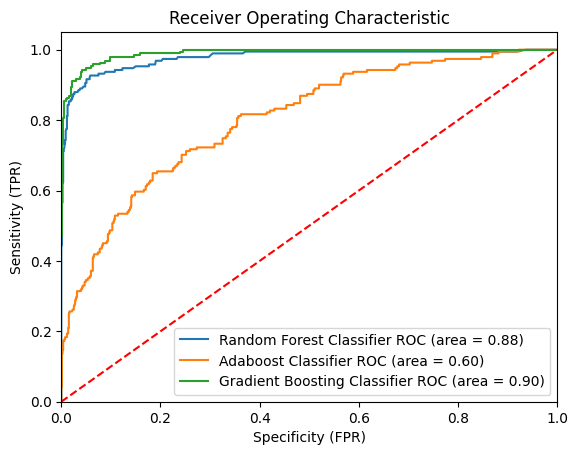

In [39]:
plt.figure()

auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(**model_param['RF']),
        'auc': 0.8810
    },
    {
        'label': 'Adaboost Classifier',
        'model': AdaBoostClassifier(**model_param['AB']),
        'auc': 0.6049
    },
    {
        'label': 'Gradient Boosting Classifier',
        'model': GradientBoostingClassifier(**model_param['GB']),
        'auc': 0.8973
    }
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    
    # compute False Positive Rate and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    # calculate AUC to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    
# custom settings for the plot
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()